# Death - KNN Classifier

In [1]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
#read in data set
df = pd.read_csv("Resources/period1_final_data.csv")
df.head(20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
2,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,...,1,1,2956,2956,2956,2956,2089,2089,2956,0
4,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4285
5,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,...,1,1,8766,8766,5719,5719,8766,5719,8766,0
6,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,...,0,1,373,8766,8766,373,8766,8766,8766,2212
7,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,8679
8,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
9,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0


In [3]:
death_df = df.set_index('RANDID')
#Remove columns not involved in analysis
death_df = death_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP',
       'PREVMI', 'PREVSTRK', 'PREVHYP', 'DEATH']]
death_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,DEATH
RANDID,,,,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,0,0,0,1,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0,0,0


In [4]:
y = death_df["DEATH"]
target_names = ["negative", "positive"]

In [5]:
X = death_df.drop("DEATH", axis=1)
X.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP
RANDID,,,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,0,0,0,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.666
k: 3, Train/Test Score: 0.829/0.703
k: 5, Train/Test Score: 0.799/0.700
k: 7, Train/Test Score: 0.779/0.701
k: 9, Train/Test Score: 0.780/0.701
k: 11, Train/Test Score: 0.771/0.720
k: 13, Train/Test Score: 0.775/0.722
k: 15, Train/Test Score: 0.775/0.721
k: 17, Train/Test Score: 0.766/0.720
k: 19, Train/Test Score: 0.768/0.727
k: 21, Train/Test Score: 0.770/0.729
k: 23, Train/Test Score: 0.768/0.739
k: 25, Train/Test Score: 0.766/0.735
k: 27, Train/Test Score: 0.762/0.731
k: 29, Train/Test Score: 0.762/0.730


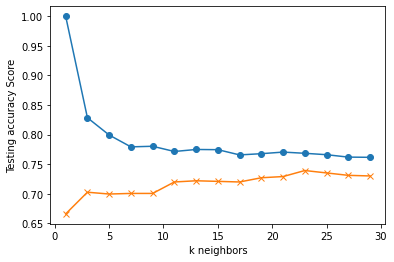

In [11]:
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# Choose K = 23 from above and re-fit the KNN Classifier using that k value.
# Note that k = 23 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=23 Test Acc: 0.739


In [13]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = knn.predict(X_test_scaled)
death_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [14]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.74      0.90      0.82       630
    positive       0.72      0.44      0.55       352

    accuracy                           0.74       982
   macro avg       0.73      0.67      0.68       982
weighted avg       0.74      0.74      0.72       982



In [15]:
p0a0 = death_predictions.loc[(death_predictions['Prediction']==0) & (death_predictions['Actual']==0)]
p1a1 = death_predictions.loc[(death_predictions['Prediction']==1) & (death_predictions['Actual']==1)]
p0a1 = death_predictions.loc[(death_predictions['Prediction']==0) & (death_predictions['Actual']==1)]
p1a0 = death_predictions.loc[(death_predictions['Prediction']==1) & (death_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  570
Event prediction = 1 and actual = 1:  156
Event prediction = 0 and actual = 1:  196
Event prediction = 1 and actual = 0:  60


In [18]:
TP = len(p1a1)
TN = len(p0a0)
FP = len(p1a0)
FN = len(p0a1)

Accuracy = (TP + TN)/len(death_predictions)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 = 2*((Precision*Recall)/ (Precision+Recall))

print("Accuracy: %.3f" % Accuracy)
print("Precision: %.3f" % Precision)
print("Recall: %.3f" % Recall)
print("F1 Measure: %.3f" % F1)

print(TP,TN,FP,FN, len(death_predictions))

Accuracy: 0.739
Precision: 0.722
Recall: 0.443
F1 Measure: 0.549
156 570 60 196 982


## Separating by gender

In [20]:
#filter df by gender (males = 1, females = 2)
male_df = death_df.loc[(death_df["SEX"] ==1)]
female_df = death_df.loc[(death_df["SEX"] ==2)]

In [21]:
male_death_df = male_df.drop('SEX', axis=1)
female_death_df = female_df.drop('SEX', axis=1)

In [22]:
y_male = male_death_df["DEATH"]
male_target_names = ["negative", "positive"]

y_female = female_death_df["DEATH"]
female_target_names = ["negative", "positive"]

In [23]:
X_male = male_death_df.drop("DEATH", axis=1)
X_female = female_death_df.drop("DEATH", axis=1)

In [24]:
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, random_state=49)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, random_state=49)

In [25]:
# Create a StandardScater model and fit it to the training data - male

X_male_scaler = StandardScaler().fit(X_male_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_male_train_scaled = X_male_scaler.transform(X_male_train)
X_male_test_scaled = X_male_scaler.transform(X_male_test)

In [27]:
m_train_scores = []
m_test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_male_train_scaled, y_male_train)
    train_score = knn.score(X_male_train_scaled, y_male_train)
    test_score = knn.score(X_male_test_scaled, y_male_test)
    m_train_scores.append(train_score)
    m_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.637
k: 3, Train/Test Score: 0.819/0.679
k: 5, Train/Test Score: 0.782/0.679
k: 7, Train/Test Score: 0.761/0.682
k: 9, Train/Test Score: 0.758/0.702
k: 11, Train/Test Score: 0.757/0.691
k: 13, Train/Test Score: 0.749/0.702
k: 15, Train/Test Score: 0.750/0.711
k: 17, Train/Test Score: 0.749/0.720
k: 19, Train/Test Score: 0.749/0.726
k: 21, Train/Test Score: 0.742/0.729
k: 23, Train/Test Score: 0.743/0.735
k: 25, Train/Test Score: 0.744/0.724
k: 27, Train/Test Score: 0.743/0.726
k: 29, Train/Test Score: 0.743/0.729


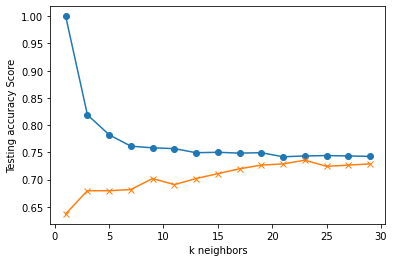

In [28]:
plt.plot(range(1, 30, 2), m_train_scores, marker='o')
plt.plot(range(1, 30, 2), m_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [29]:
# Choose K = 23 from above and re-fit the KNN Classifier using that k value.
# Note that k = 23 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_male_train_scaled, y_male_train)
print('k=23 Test Acc: %.3f' % knn.score(X_male_test_scaled, y_male_test))

k=23 Test Acc: 0.735


In [30]:
#Make predictions (0 = no event occurred, 1 = event occurred)
m_predictions = knn.predict(X_male_test_scaled)
m_death_predictions = pd.DataFrame({"Prediction": m_predictions, "Actual": y_male_test}).reset_index(drop=True)


In [31]:
mp0a0 = m_death_predictions.loc[(m_death_predictions['Prediction']==0) & (m_death_predictions['Actual']==0)]
mp1a1 = m_death_predictions.loc[(m_death_predictions['Prediction']==1) & (m_death_predictions['Actual']==1)]
mp0a1 = m_death_predictions.loc[(m_death_predictions['Prediction']==0) & (m_death_predictions['Actual']==1)]
mp1a0 = m_death_predictions.loc[(m_death_predictions['Prediction']==1) & (m_death_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (male):  {len(mp0a0)}")
print(f"Event prediction = 1 and actual = 1 (male):  {len(mp1a1)}")
print(f"Event prediction = 0 and actual = 1 (male):  {len(mp0a1)}")
print(f"Event prediction = 1 and actual = 0 (male):  {len(mp1a0)}")

Event prediction = 0 and actual = 0 (male):  225
Event prediction = 1 and actual = 1 (male):  103
Event prediction = 0 and actual = 1 (male):  82
Event prediction = 1 and actual = 0 (male):  36


In [41]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_male_test, m_predictions,
                            target_names=male_target_names))

              precision    recall  f1-score   support

    negative       0.73      0.86      0.79       261
    positive       0.74      0.56      0.64       185

    accuracy                           0.74       446
   macro avg       0.74      0.71      0.71       446
weighted avg       0.74      0.74      0.73       446



In [32]:
TP = len(mp1a1)
TN = len(mp0a0)
FP = len(mp1a0)
FN = len(mp0a1)

Accuracy = (TP + TN)/len(m_death_predictions)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 = 2*((Precision*Recall)/ (Precision+Recall))

print("Accuracy: %.3f" % Accuracy)
print("Precision: %.3f" % Precision)
print("Recall: %.3f" % Recall)
print("F1 Measure: %.3f" % F1)

Accuracy: 0.735
Precision: 0.741
Recall: 0.557
F1 Measure: 0.636


In [33]:
# Create a StandardScater model and fit it to the training data - female

X_female_scaler = StandardScaler().fit(X_female_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_female_train_scaled = X_female_scaler.transform(X_female_train)
X_female_test_scaled = X_female_scaler.transform(X_female_test)

In [34]:
f_train_scores = []
f_test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_female_train_scaled, y_female_train)
    train_score = knn.score(X_female_train_scaled, y_female_train)
    test_score = knn.score(X_female_test_scaled, y_female_test)
    f_train_scores.append(train_score)
    f_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.659
k: 3, Train/Test Score: 0.843/0.691
k: 5, Train/Test Score: 0.813/0.713
k: 7, Train/Test Score: 0.802/0.706
k: 9, Train/Test Score: 0.795/0.717
k: 11, Train/Test Score: 0.794/0.719
k: 13, Train/Test Score: 0.791/0.724
k: 15, Train/Test Score: 0.785/0.719
k: 17, Train/Test Score: 0.779/0.715
k: 19, Train/Test Score: 0.780/0.728
k: 21, Train/Test Score: 0.780/0.736
k: 23, Train/Test Score: 0.783/0.736
k: 25, Train/Test Score: 0.785/0.737
k: 27, Train/Test Score: 0.782/0.736
k: 29, Train/Test Score: 0.782/0.730


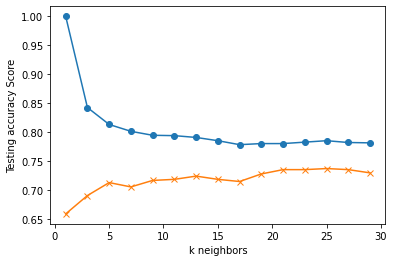

In [35]:
plt.plot(range(1, 30, 2), f_train_scores, marker='o')
plt.plot(range(1, 30, 2), f_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [36]:
# Choose K = 25 from above and re-fit the KNN Classifier using that k value.
# Note that k = 25 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_female_train_scaled, y_female_train)
print('k=25 Test Acc: %.3f' % knn.score(X_female_test_scaled, y_female_test))

k=25 Test Acc: 0.737


In [37]:
#Make predictions (0 = no event occurred, 1 = event occurred)
f_predictions = knn.predict(X_female_test_scaled)
f_death_predictions = pd.DataFrame({"Prediction": f_predictions, "Actual": y_female_test}).reset_index(drop=True)


In [38]:
fp0a0 = f_death_predictions.loc[(f_death_predictions['Prediction']==0) & (f_death_predictions['Actual']==0)]
fp1a1 = f_death_predictions.loc[(f_death_predictions['Prediction']==1) & (f_death_predictions['Actual']==1)]
fp0a1 = f_death_predictions.loc[(f_death_predictions['Prediction']==0) & (f_death_predictions['Actual']==1)]
fp1a0 = f_death_predictions.loc[(f_death_predictions['Prediction']==1) & (f_death_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (female):  {len(fp0a0)}")
print(f"Event prediction = 1 and actual = 1 (female):  {len(fp1a1)}")
print(f"Event prediction = 0 and actual = 1 (female):  {len(fp0a1)}")
print(f"Event prediction = 1 and actual = 0 (female):  {len(fp1a0)}")

Event prediction = 0 and actual = 0 (female):  354
Event prediction = 1 and actual = 1 (female):  42
Event prediction = 0 and actual = 1 (female):  108
Event prediction = 1 and actual = 0 (female):  33


In [42]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_female_test, f_predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.77      0.91      0.83       387
    positive       0.56      0.28      0.37       150

    accuracy                           0.74       537
   macro avg       0.66      0.60      0.60       537
weighted avg       0.71      0.74      0.71       537



In [39]:
TP = len(fp1a1)
TN = len(fp0a0)
FP = len(fp1a0)
FN = len(fp0a1)

Accuracy = (TP + TN)/len(f_death_predictions)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 = 2*((Precision*Recall)/ (Precision+Recall))

print("Accuracy: %.3f" % Accuracy)
print("Precision: %.3f" % Precision)
print("Recall: %.3f" % Recall)
print("F1 Measure: %.3f" % F1)

Accuracy: 0.737
Precision: 0.560
Recall: 0.280
F1 Measure: 0.373
